In [270]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [271]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [272]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [273]:
# Lets find all the features
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [274]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [275]:
# give descriptive statistics for numerical/comtinous columns
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [276]:
train_df.describe(exclude = 'category')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ibrahim Shawah, Mr. Yousseff",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [277]:
# data analysis

In [278]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [279]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [280]:
x = train_df[train_df['Pclass']==1]
x.head()
tot_pclass1 = x.count()['Pclass']
print(tot_pclass1)
tot_surv  = x[x['Survived']==1].count()['Survived']
print(tot_surv)
per_surv = (tot_surv)/tot_pclass1
print(per_surv)

216
136
0.6296296296296297


In [281]:
a = train_df[['Pclass','Survived']]
a.groupby(['Pclass']).mean()
# groupby has actually grouped all the same Pclass values and found their mean value

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [282]:
train_df[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [283]:
train_df[['SibSp','Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [284]:
train_df[['Parch','Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [285]:
train_df[['Embarked','Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [286]:
# analyzing the survived by age groups
b = train_df[train_df['Age']<=14]  # no. of survived whose  age is less than 15
print(b[b['Survived']==1].shape[0])
c = train_df[(train_df['Age']>14) & (train_df['Age']<35)]
print(c[c['Survived']==1].shape[0])
d = train_df[train_df['Age']>=35]
print(d[d['Survived']==1].shape[0])

45
151
94


In [287]:
# analyzing by visualizing the data

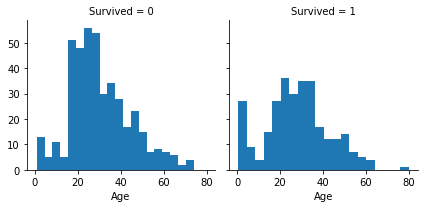

In [288]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins = 20)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


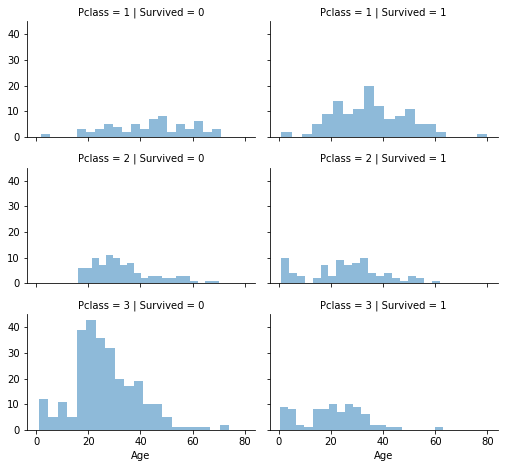

In [289]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
#Pclass 1 had more survival

In [290]:
# visualizing categorical features

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


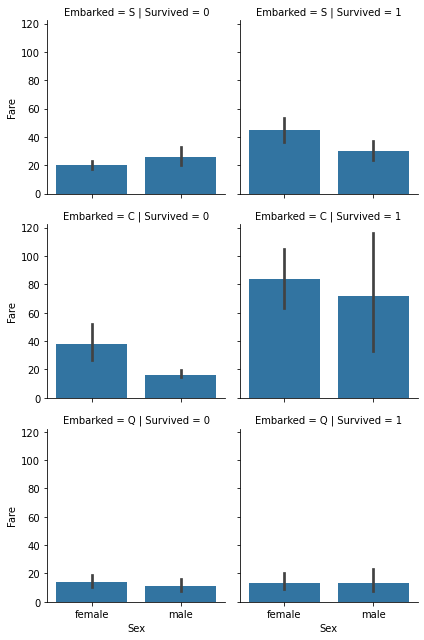

In [291]:
grid = sns.FacetGrid(train_df,row = "Embarked",col = "Survived")
grid.map(sns.barplot,"Sex","Fare")
# higher fare people had more survival

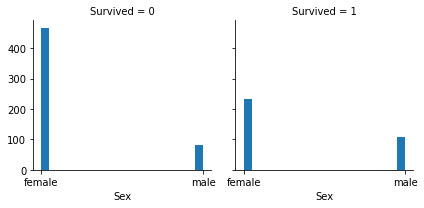

In [292]:
grid = sns.FacetGrid(train_df,col = "Survived")
grid.map(plt.hist,"Sex",bins = 20)

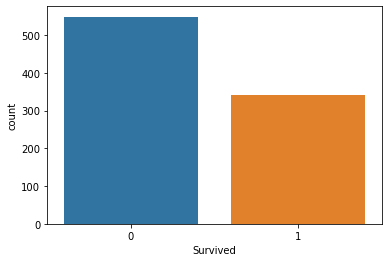

In [293]:
# countplot -  for categorical variables
sns.countplot("Survived",data = train_df)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


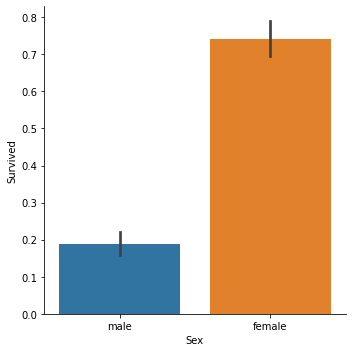

In [294]:
# factorplot is also used for plotting categorical values
sns.factorplot(x = "Sex",y = "Survived",data = train_df,kind = "bar")

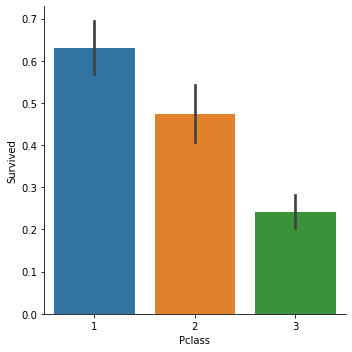

In [295]:
sns.factorplot(x = "Pclass",y = "Survived",data = train_df,kind = "bar")

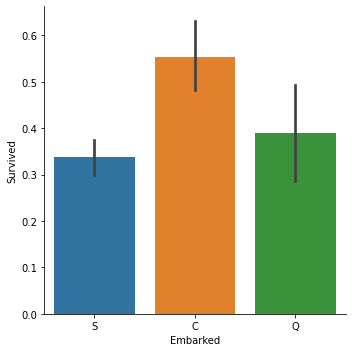

In [296]:
sns.factorplot(x = "Embarked",y = "Survived",data = train_df,kind = "bar")

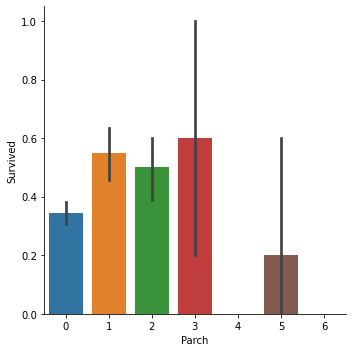

In [297]:
sns.factorplot(x = "Parch",y = "Survived",data = train_df,kind = "bar")

In [298]:
# Wrangling the data

In [299]:
train_df = train_df.drop(['Ticket','Name','Cabin'],axis  = 1)

In [300]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [301]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [302]:
combine = [train_df,test_df]
combine

[     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
 0              1         0       3    male  22.0      1      0   7.2500   
 1              2         1       1  female  38.0      1      0  71.2833   
 2              3         1       3  female  26.0      0      0   7.9250   
 3              4         1       1  female  35.0      1      0  53.1000   
 4              5         0       3    male  35.0      0      0   8.0500   
 ..           ...       ...     ...     ...   ...    ...    ...      ...   
 886          887         0       2    male  27.0      0      0  13.0000   
 887          888         1       1  female  19.0      0      0  30.0000   
 888          889         0       3  female   NaN      1      2  23.4500   
 889          890         1       1    male  26.0      0      0  30.0000   
 890          891         0       3    male  32.0      0      0   7.7500   
 
     Embarked  
 0          S  
 1          C  
 2          S  
 3          S  
 4    

In [303]:
# convert the categorical string to numerical

In [304]:
# lets first check which features have nan values
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Embarked'], dtype='object')

In [305]:
for data in combine: 
    data['Sex'].replace(['male','female'],[0,1],inplace=True)
    data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)


In [306]:
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0
5,6,0,3,0,NaN,0,0,8.4583,2.0
6,7,0,1,0,54.0,0,0,51.8625,0.0
7,8,0,3,0,2.0,3,1,21.0750,0.0
8,9,1,3,1,27.0,0,2,11.1333,0.0
9,10,1,2,1,14.0,1,0,30.0708,1.0


In [307]:
''''
Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

A simple way is to generate random numbers between mean and standard deviation.

More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.
'''


"'\nNow we should start estimating and completing features with missing or null values. We will first do this for the Age feature.\n\nWe can consider three methods to complete a numerical continuous feature.\n\nA simple way is to generate random numbers between mean and standard deviation.\n\nMore accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...\n\nCombine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.\n\nMethod 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.\n"

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


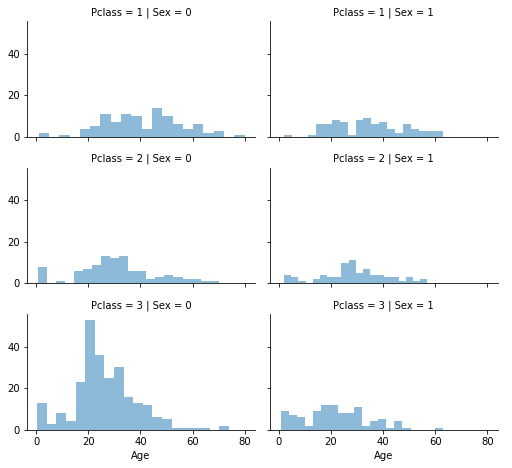

In [308]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [309]:
# so we try to predict age group for all combinations i.e total 6 combinations possible
guess_ages = np.zeros((2,3))

In [310]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess  = guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    
    dataset['Age'] = dataset['Age'].astype(int)


In [311]:
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7.2500,0.0
1,2,1,1,1,38,1,0,71.2833,1.0
2,3,1,3,1,26,0,0,7.9250,0.0
3,4,1,1,1,35,1,0,53.1000,0.0
4,5,0,3,0,35,0,0,8.0500,0.0
5,6,0,3,0,25,0,0,8.4583,2.0
6,7,0,1,0,54,0,0,51.8625,0.0
7,8,0,3,0,2,3,1,21.0750,0.0
8,9,1,3,1,27,0,2,11.1333,0.0
9,10,1,2,1,14,1,0,30.0708,1.0


In [312]:
# insetead of analyizng survival fodifferent age groups manually, we can do so by making age bands using 'cut'
train_df['AgeBand'] = pd.cut(train_df['Age'],5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [313]:
# creating catrgorical or classes as 0,1,2,3 for diff age groups using 'loc'
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,1,0,3,0,1,1,0,7.2500,0.0,"(16.0, 32.0]"
1,2,1,1,1,2,1,0,71.2833,1.0,"(32.0, 48.0]"
2,3,1,3,1,1,0,0,7.9250,0.0,"(16.0, 32.0]"
3,4,1,1,1,2,1,0,53.1000,0.0,"(32.0, 48.0]"
4,5,0,3,0,2,0,0,8.0500,0.0,"(32.0, 48.0]"


In [314]:
# now we can drop ageBand
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,7.2500,0.0
1,2,1,1,1,2,1,0,71.2833,1.0
2,3,1,3,1,1,0,0,7.9250,0.0
3,4,1,1,1,2,1,0,53.1000,0.0
4,5,0,3,0,2,0,0,8.0500,0.0


In [315]:
# filll the embarked nan values with most frequent value
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

0.0

In [316]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,1.0,0.553571
2,2.0,0.389610
0,0.0,0.339009


In [317]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0


In [318]:
# we can also create bands for fare just like we did for age band or either drop fare columns as it is not much significant
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [319]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,1,0,0,0.0
1,2,1,1,1,2,1,0,3,1.0
2,3,1,3,1,1,0,0,1,0.0
3,4,1,1,1,2,1,0,3,0.0
4,5,0,3,0,2,0,0,1,0.0
5,6,0,3,0,1,0,0,1,2.0
6,7,0,1,0,3,0,0,3,0.0
7,8,0,3,0,0,3,1,2,0.0
8,9,1,3,1,1,0,2,1,0.0
9,10,1,2,1,0,1,0,2,1.0


In [320]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [321]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [322]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,1,0,3,0,1,0,0.0,0
1,2,1,1,1,2,3,1.0,0
2,3,1,3,1,1,1,0.0,1
3,4,1,1,1,2,3,0.0,0
4,5,0,3,0,2,1,0.0,1


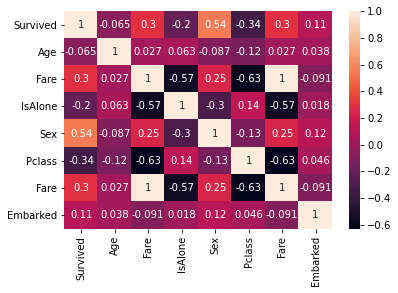

In [323]:
train_df.head()
train_df.drop(['PassengerId'],axis = 1,inplace = True)
sns.heatmap(train_df[["Survived","Age","Fare","IsAlone","Sex","Pclass","Fare","Embarked"]].corr(), annot = True)
plt.show()

In [324]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,0,0.0,0
1,1,1,1,2,3,1.0,0
2,1,3,1,1,1,0.0,1
3,1,1,1,2,3,0.0,0
4,0,3,0,2,1,0.0,1


In [325]:
# Create Models to predict!!!!

In [326]:
test_df =  test_df.drop(['Name','Ticket','Cabin'],axis = 1)

In [327]:
test_df

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,892,3,0,2,0,2,1
1,893,3,1,2,0,0,0
2,894,2,0,3,1,2,1
3,895,3,0,1,1,0,1
4,896,3,1,1,1,0,0
...,...,...,...,...,...,...,...
413,1305,3,0,1,1,0,1
414,1306,1,1,2,3,1,1
415,1307,3,0,2,0,0,1
416,1308,3,0,1,1,0,1


In [328]:
x_train = train_df.drop("Survived",axis = 1)
y_train = train_df['Survived']
x_test = test_df.drop(['PassengerId'],axis = 1).copy()
print(x_train)
print(y_train)
print(x_test)

     Pclass  Sex  Age  Fare  Embarked  IsAlone
0         3    0    1     0       0.0        0
1         1    1    2     3       1.0        0
2         3    1    1     1       0.0        1
3         1    1    2     3       0.0        0
4         3    0    2     1       0.0        1
..      ...  ...  ...   ...       ...      ...
886       2    0    1     1       0.0        1
887       1    1    1     2       0.0        1
888       3    1    1     2       0.0        0
889       1    0    1     2       1.0        1
890       3    0    1     0       2.0        1

[891 rows x 6 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
     Pclass  Sex  Age  Fare  Embarked  IsAlone
0         3    0    2     0         2        1
1         3    1    2     0         0        0
2         2    0    3     1         2        1
3         3    0    1     1         0        1
4         3    1    1     1         

In [329]:
# logistic Regression


In [330]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)  # score is based on the trianing set
acc_log

78.56

In [331]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df

,0
0,Pclass
1,Sex
2,Age
3,Fare
4,Embarked
5,IsAlone


In [332]:
print(train_df)
train_df.columns.delete(0)  # deletes the 1st column

     Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone
0           0       3    0    1     0       0.0        0
1           1       1    1    2     3       1.0        0
2           1       3    1    1     1       0.0        1
3           1       1    1    2     3       0.0        0
4           0       3    0    2     1       0.0        1
..        ...     ...  ...  ...   ...       ...      ...
886         0       2    0    1     1       0.0        1
887         1       1    1    1     2       0.0        1
888         0       3    1    1     2       0.0        0
889         1       1    0    1     2       1.0        1
890         0       3    0    1     0       2.0        1

[891 rows x 7 columns]


Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'IsAlone'], dtype='object')

In [333]:
coeff_df.columns = ['Features']
coeff_df
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df

,Features,Correlation
0,Pclass,-0.990297
1,Sex,2.455890
2,Age,-0.030830
3,Fare,-0.006719
4,Embarked,0.315199
5,IsAlone,-0.132519


In [334]:
titanic = test_df[['PassengerId']]
titanic['Survived'] = y_pred
titanic

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [335]:
import os
os.chdir(r'../working')
titanic.to_csv(r'titanic.csv',index = False)
from IPython.display import FileLink
FileLink(r'titanic.csv')

/kaggle/working/titanic.csv

In [336]:
# Support vector Machines

In [337]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

78.79

In [338]:
titanic = test_df[['PassengerId']]
titanic['Survived'] = y_pred
import os
os.chdir(r'../working')
titanic.to_csv(r'titanic.csv',index = False)
from IPython.display import FileLink
FileLink(r'titanic.csv')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/kaggle/working/titanic.csv

In [339]:
# KNN

In [345]:
k = 2
acc_score = []
while k<=20:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    acc_knn = round(knn.score(x_train, y_train) * 100, 2)
    acc_score.append(acc_knn)
    k = k+1
print(acc_score)
temp = acc_score[0]
k = 2
for i in range(len(acc_score)):
    if acc_score[i]>temp:
        temp = acc_score[i]
        k = i+2
print(k)


[82.72, 83.5, 83.61, 83.61, 83.73, 84.18, 84.06, 83.28, 83.28, 83.05, 83.16, 82.04, 82.38, 82.27, 81.59, 82.27, 81.59, 81.59, 81.14]
7


In [346]:
# lets find y_pred for  k = 7
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

84.18

In [347]:
titanic = test_df[['PassengerId']]
titanic['Survived'] = y_pred
import os
os.chdir(r'../working')
titanic.to_csv(r'titanic.csv',index = False)
from IPython.display import FileLink
FileLink(r'titanic.csv')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/kaggle/working/titanic.csv

In [348]:
# Gaussian Naive Bayes

In [349]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

75.31

In [351]:
#Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd

76.99

In [352]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

85.75

In [353]:
titanic = test_df[['PassengerId']]
titanic['Survived'] = y_pred
import os
os.chdir(r'../working')
titanic.to_csv(r'titanic.csv',index = False)
from IPython.display import FileLink
FileLink(r'titanic.csv')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/kaggle/working/titanic.csv

In [357]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

85.75

In [355]:
titanic = test_df[['PassengerId']]
titanic['Survived'] = y_pred
import os
os.chdir(r'../working')
titanic.to_csv(r'titanic.csv',index = False)
from IPython.display import FileLink
FileLink(r'titanic.csv')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/kaggle/working/titanic.csv

In [358]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

74.3

In [359]:
titanic = test_df[['PassengerId']]
titanic['Survived'] = y_pred
import os
os.chdir(r'../working')
titanic.to_csv(r'titanic.csv',index = False)
from IPython.display import FileLink
FileLink(r'titanic.csv')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/kaggle/working/titanic.csv

In [360]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent',  
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd,  acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

NameError: name 'acc_linear_svc' is not defined